In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [41]:
def load():
  data = pd.read_csv("/content/sample_data/score.csv")
  return data

In [42]:
df = load()

In [43]:
def check_df(dataframe, head=5):
   print("#################  Shape  ####################")
   print(dataframe.shape)
   print("############  Types  ###########")
   print(dataframe.dtypes)
   print("#############  Head  ############")
   print(dataframe.head(head))
   print("##########  Tail  #########")
   print(dataframe.tail(head))
   print("##########  NA  ##########")
   print(dataframe.isnull().sum())
   print("##########  Quantiles  ########")
   print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)


#################  Shape  ####################
(25, 2)
############  Types  ###########
Hours     float64
Scores      int64
dtype: object
#############  Head  ############
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
##########  Tail  #########
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
##########  NA  ##########
Hours     0
Scores    0
dtype: int64
##########  Quantiles  ########
        count    mean        std   min    0%     5%   50%    95%     99%  \
Hours    25.0   5.012   2.525094   1.1   1.1   1.58   4.8   8.82   9.128   
Scores   25.0  51.480  25.286887  17.0  17.0  20.20  47.0  87.60  93.320   

        100%   max  
Hours    9.2   9.2  
Scores  95.0  95.0  


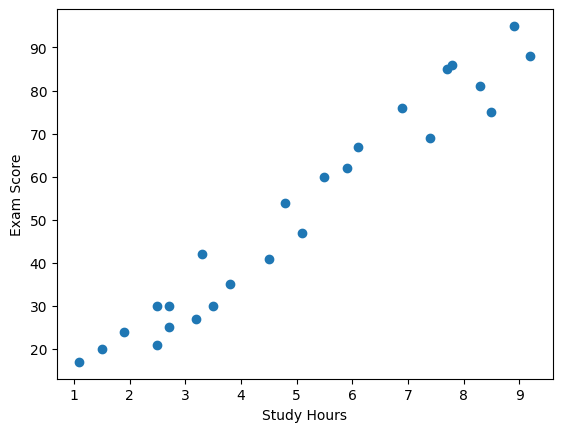

In [44]:
plt.scatter(df["Hours"],df["Scores"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [45]:
x = df[["Hours"]]
y = df["Scores"]

In [46]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [47]:
print(type(y))

<class 'pandas.core.series.Series'>


In [48]:
#test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [49]:
y_train

,Scores
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24
21,54


In [50]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42
1,47


In [51]:
#standardizastion
from sklearn.preprocessing import StandardScaler

In [52]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [53]:
scaler = StandardScaler()

In [54]:
x_train

,Hours
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9
21,4.8


In [55]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [56]:
x_train_scaled

array([[-0.52813656],
       [-1.40686591],
       [-0.7573703 ],
       [-0.2606972 ],
       [ 1.42035024],
       [ 1.26752775],
       [-0.64275343],
       [-0.94839842],
       [-1.25404341],
       [-0.14608033],
       [ 0.35059278],
       [ 1.00008838],
       [ 0.12135904],
       [ 0.96188276],
       [-1.5596884 ],
       [ 0.84726589],
       [ 1.53496712]])

In [57]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [58]:
regression.fit(x_train_scaled, y_train)

LinearRegression()

In [59]:
print("Coefficient (katsayi) :", regression.coef_)
print("Intercept (Kesisim) :", regression.intercept_)

Coefficient (katsayi) : [25.4165225]
Intercept (Kesisim) : 53.11764705882353


In [60]:
#y = 25x + 53.1

/tmp/ipython-input-243/1073264610.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


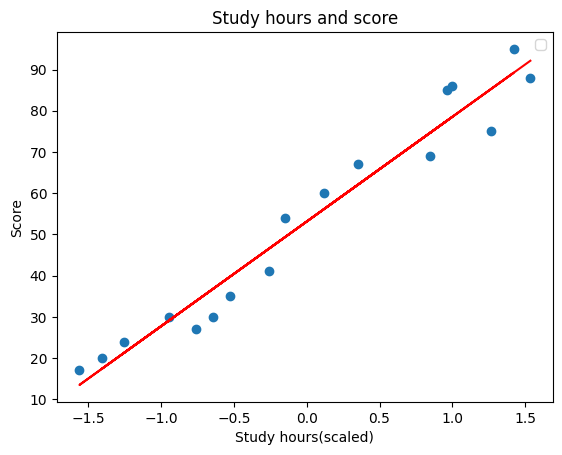

In [61]:
plt.scatter(x_train_scaled, y_train)
plt.plot(x_train_scaled, regression.predict(x_train_scaled), "r")
plt.xlabel("Study hours(scaled)")
plt.ylabel("Score")
plt.title("Study hours and score")
plt.legend()
plt.show()

In [62]:
#x = 10, y=?
regression.predict([[10]])

array([307.28287204])

In [63]:
#We are translating into a language the model can understand.
scaler.transform([[10]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.84061211]])

In [64]:
regression.predict(scaler.transform([[10]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([99.89960604])

In [65]:
regression.predict(scaler.transform([[5]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([51.34690136])

In [67]:
regression.predict(scaler.transform([[0]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2.79419668])

In [69]:
#predict_with_test_data
y_pred = regression.predict(x_test_scaled)
y_pred

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

In [70]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42
1,47


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [72]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  23.619457614151756
mae:  4.499999999999999
rmse:  4.8599853512281035


In [73]:
r2 = r2_score(y_test, y_pred)
r2

0.9487647340257012

Model success is 94%